## This part is the combination of the two datasets, the EpochEnergy_c.csv and the EpochEnergy_f.csv datasets and do the following:
1. Combine the two datasets into one dataset
2. Add columns to the dataset to indicate the other information of the dataset
3. Save the dataset as a new csv file
4. Do the analysis of the dataset

In [27]:
# load the corresponding modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

### 1. Combine the two datasets into one dataset

In [28]:
cur_dir = os.getcwd()
# get the parent directory
parent_dir = os.path.dirname(cur_dir)
# get the data directory
data_dir = os.path.join(parent_dir, 'Data/alexnet/CombinedInfo')
data_dir

'/Users/dtjgp/Projects/GreenAI/PVWatts/Data/alexnet/CombinedInfo'

In [29]:
filepath_f = os.path.join(data_dir, 'EpochEnergy_f.csv')
filepath_c = os.path.join(data_dir, 'EpochEnergy_c.csv')

In [30]:
# load the data
EpochEnergy_f = pd.read_csv(filepath_f)
EpochEnergy_c = pd.read_csv(filepath_c)
print(EpochEnergy_f.head())
print('*'*50)
print(EpochEnergy_c.head())

        40       45       50       55       60       65       70       75  \
0  2683.07  2371.09  2341.95  2405.66  2509.99  2582.94  2696.77  2812.54   
1  2700.27  2396.25  2328.66  2449.11  2554.19  2636.43  2691.77  2882.49   
2  2738.96  2398.51  2376.83  2449.64  2557.75  2638.04  2762.67  2880.62   
3  2740.38  2398.44  2376.24  2448.69  2555.82  2636.39  2763.72  2880.53   
4  2738.02  2397.76  2378.69  2449.12  2554.21  2637.55  2762.96  2881.49   

        80       85       90       95  
0  2935.01  3090.42  3167.15  3273.83  
1  3000.85  3167.97  3221.32  3282.47  
2  2991.36  3140.99  3263.48  3415.52  
3  2989.76  3143.88  3262.43  3426.08  
4  2967.87  3141.93  3226.04  3416.91  
**************************************************
        40       45       50       55       60       65       70       75  \
0  2484.68  2293.58  2361.83  2521.42  2637.06  2727.37  2814.70  3005.57   
1  2499.56  2316.04  2391.29  2515.51  2678.95  2777.26  2923.30  3062.16   
2  2511.06  231

In [31]:
X_f = EpochEnergy_f.columns[:].astype(float).values.reshape(-1, 1)  # 以每列的列名值作为输入特征
Y_f = EpochEnergy_f.iloc[:, :].values.T  # 每列的数据按行作为输出（目标值）
X_c = EpochEnergy_c.columns[:].astype(float).values.reshape(-1, 1)  # 以每列的列名值作为输入特征
Y_c = EpochEnergy_c.iloc[:, :].values.T  # 每列的数据按行作为输出（目标值）

In [32]:
X_expanded_f = np.repeat(X_f, Y_f.shape[1], axis=0)  # 重复每个最大功耗多次
Y_expanded_f = Y_f.flatten()  # 将能耗矩阵展平为1维
X_expanded_c = np.repeat(X_c, Y_c.shape[1], axis=0)  # 重复每个最大功耗多次
Y_expanded_c = Y_c.flatten()  # 将能耗矩阵展平为1维

In [33]:
expanded_data_f = pd.DataFrame({'Max Power': X_expanded_f.flatten(), 'Energy Consumption': Y_expanded_f})
expanded_data_c = pd.DataFrame({'Max Power': X_expanded_c.flatten(), 'Energy Consumption': Y_expanded_c})
print(expanded_data_f.head())
print('*'*50)
print(expanded_data_c.head())

   Max Power  Energy Consumption
0       40.0             2683.07
1       40.0             2700.27
2       40.0             2738.96
3       40.0             2740.38
4       40.0             2738.02
**************************************************
   Max Power  Energy Consumption
0       40.0             2484.68
1       40.0             2499.56
2       40.0             2511.06
3       40.0             2554.35
4       40.0             2552.74


In [34]:
# 5. 分离特征和目标
X_long_f = expanded_data_f[['Max Power']].values
Y_long_f = expanded_data_f['Energy Consumption'].values
X_long_c = expanded_data_c[['Max Power']].values
Y_long_c = expanded_data_c['Energy Consumption'].values

In [35]:
# 6. 使用梯度提升回归模型
gbr_model_f = GradientBoostingRegressor(random_state=40)
gbr_model_c = GradientBoostingRegressor(random_state=42)

In [36]:
# 7. 进行5折交叉验证，评估模型性能
mse_scores_long_f = cross_val_score(gbr_model_f, X_long_f, Y_long_f, scoring='neg_mean_squared_error', cv=5)
mae_scores_long_f = cross_val_score(gbr_model_f, X_long_f, Y_long_f, scoring='neg_mean_absolute_error', cv=5)
mse_scores_long_c = cross_val_score(gbr_model_c, X_long_c, Y_long_c, scoring='neg_mean_squared_error', cv=5)
mae_scores_long_c = cross_val_score(gbr_model_c, X_long_c, Y_long_c, scoring='neg_mean_absolute_error', cv=5)

In [37]:
# 转换为正值，并计算平均误差
mean_mse_long_f = -np.mean(mse_scores_long_f)
mean_mae_long_f = -np.mean(mae_scores_long_f)
mean_mse_long_c = -np.mean(mse_scores_long_c)
mean_mae_long_c = -np.mean(mae_scores_long_c)

In [38]:
print(f"5-Fold Cross-Validated MSE: {mean_mse_long_f}")
print(f"5-Fold Cross-Validated MAE: {mean_mae_long_f}")
print(f"5-Fold Cross-Validated MSE: {mean_mse_long_c}")
print(f"5-Fold Cross-Validated MAE: {mean_mae_long_c}")

5-Fold Cross-Validated MSE: 19985.955618673026
5-Fold Cross-Validated MAE: 99.93026139604538
5-Fold Cross-Validated MSE: 21898.455645929916
5-Fold Cross-Validated MAE: 120.51808055919096


In [39]:
# 8. 在整个数据集上训练模型
gbr_model_f.fit(X_long_f, Y_long_f)
gbr_model_c.fit(X_long_c, Y_long_c)

GradientBoostingRegressor(random_state=42)

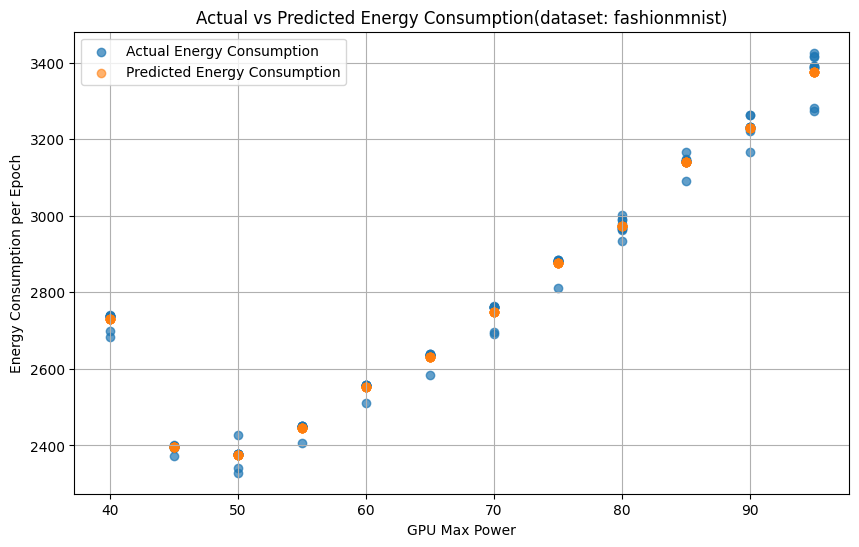

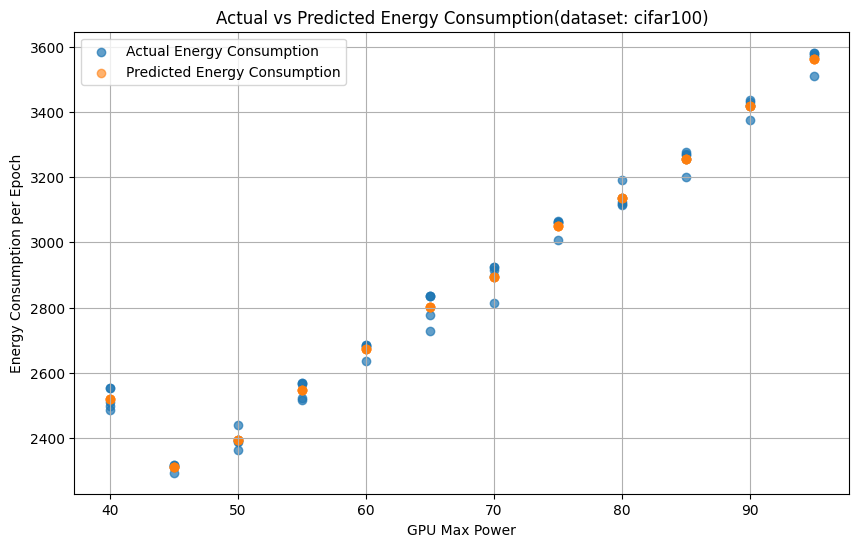

In [40]:
# 9. 绘制实际值与预测值的对比图
Y_pred_long_f = gbr_model_f.predict(X_long_f)
plt.figure(figsize=(10, 6))
plt.scatter(X_long_f, Y_long_f, label='Actual Energy Consumption', alpha=0.7)
plt.scatter(X_long_f, Y_pred_long_f, label='Predicted Energy Consumption', alpha=0.6)
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Actual vs Predicted Energy Consumption(dataset: fashionmnist)')
plt.legend()
plt.grid(True)
plt.show()

Y_pred_long_c = gbr_model_c.predict(X_long_c)
plt.figure(figsize=(10, 6))
plt.scatter(X_long_c, Y_long_c, label='Actual Energy Consumption', alpha=0.7)
plt.scatter(X_long_c, Y_pred_long_c, label='Predicted Energy Consumption', alpha=0.6)
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Actual vs Predicted Energy Consumption(dataset: cifar100)')
plt.legend()
plt.grid(True)
plt.show()

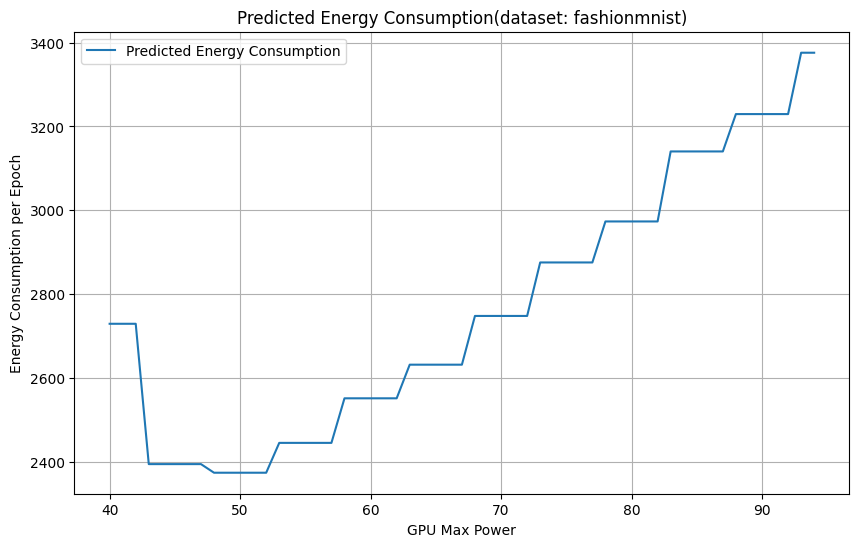

In [53]:
y_pred_f = []
for i in range(40, 95):
    y_pred_f.append(gbr_model_f.predict([[i]])[0])

# plot the predicted energy consumption
plt.figure(figsize=(10, 6))
plt.plot(range(40, 95), y_pred_f, label='Predicted Energy Consumption')
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Predicted Energy Consumption(dataset: fashionmnist)')
plt.legend()
plt.grid(True)
plt.show()

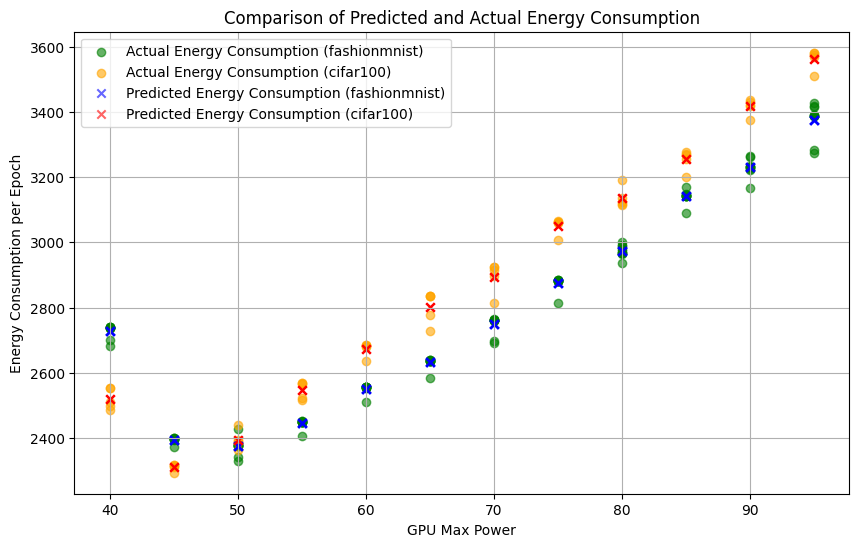

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X_long_f, Y_long_f, label='Actual Energy Consumption (fashionmnist)', color='green', alpha=0.6)
plt.scatter(X_long_c, Y_long_c, label='Actual Energy Consumption (cifar100)', color='orange', alpha=0.6)
plt.scatter(X_long_f, Y_pred_long_f, label='Predicted Energy Consumption (fashionmnist)', color='blue', alpha=0.6, marker='x')
plt.scatter(X_long_c, Y_pred_long_c, label='Predicted Energy Consumption (cifar100)', color='red', alpha=0.6, marker='x')
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Comparison of Predicted and Actual Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

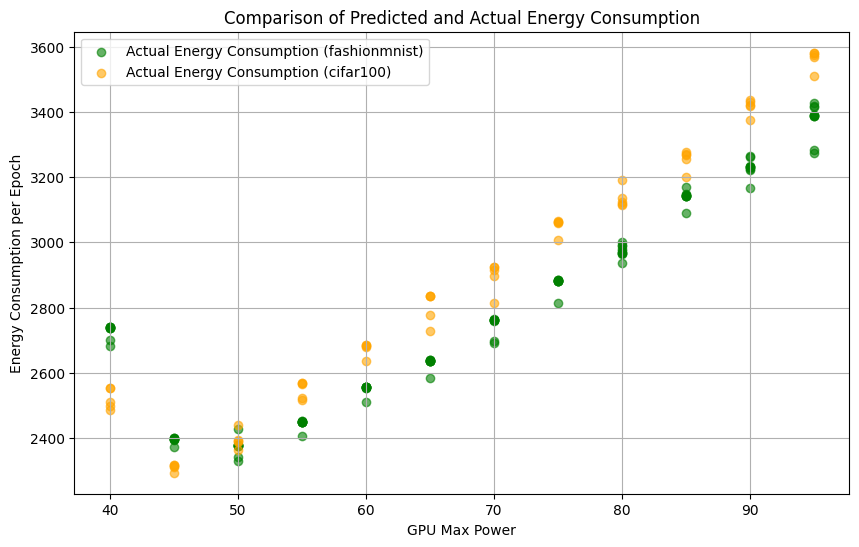

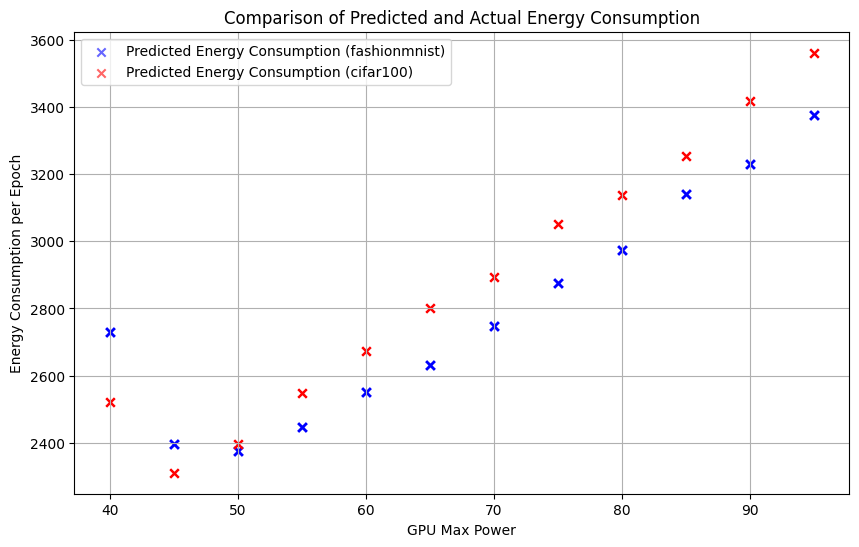

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_long_f, Y_long_f, label='Actual Energy Consumption (fashionmnist)', color='green', alpha=0.6)
plt.scatter(X_long_c, Y_long_c, label='Actual Energy Consumption (cifar100)', color='orange', alpha=0.6)
# plt.scatter(X_long_f, Y_pred_long_f, label='Predicted Energy Consumption (fashionmnist)', color='blue', alpha=0.6, marker='x')
# plt.scatter(X_long_c, Y_pred_long_c, label='Predicted Energy Consumption (cifar100)', color='red', alpha=0.6, marker='x')
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Comparison of Predicted and Actual Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
# plt.scatter(X_long_f, Y_long_f, label='Actual Energy Consumption (fashionmnist)', color='green', alpha=0.6)
# plt.scatter(X_long_c, Y_long_c, label='Actual Energy Consumption (cifar100)', color='orange', alpha=0.6)
plt.scatter(X_long_f, Y_pred_long_f, label='Predicted Energy Consumption (fashionmnist)', color='blue', alpha=0.6, marker='x')
plt.scatter(X_long_c, Y_pred_long_c, label='Predicted Energy Consumption (cifar100)', color='red', alpha=0.6, marker='x')
plt.xlabel('GPU Max Power')
plt.ylabel('Energy Consumption per Epoch')
plt.title('Comparison of Predicted and Actual Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
print(Y_long_f)
print('*'*50)
print(Y_long_c)

[2683.07 2700.27 2738.96 2740.38 2738.02 2738.1  2739.46 2738.68 2738.32
 2739.35 2371.09 2396.25 2398.51 2398.44 2397.76 2392.36 2396.52 2401.07
 2399.18 2396.86 2341.95 2328.66 2376.83 2376.24 2378.69 2428.08 2376.97
 2378.54 2378.71 2377.64 2405.66 2449.11 2449.64 2448.69 2449.12 2449.27
 2451.98 2450.2  2450.84 2449.79 2509.99 2554.19 2557.75 2555.82 2554.21
 2556.63 2557.79 2556.   2556.99 2557.82 2582.94 2636.43 2638.04 2636.39
 2637.55 2638.2  2637.47 2636.76 2637.35 2638.07 2696.77 2691.77 2762.67
 2763.72 2762.96 2761.69 2758.4  2760.67 2761.38 2761.43 2812.54 2882.49
 2880.62 2880.53 2881.49 2884.82 2885.3  2885.48 2881.09 2882.64 2935.01
 3000.85 2991.36 2989.76 2967.87 2967.85 2978.69 2966.37 2973.04 2964.09
 3090.42 3167.97 3140.99 3143.88 3141.93 3143.12 3141.56 3144.54 3147.55
 3142.43 3167.15 3221.32 3263.48 3262.43 3226.04 3229.22 3231.35 3232.65
 3230.88 3230.87 3273.83 3282.47 3415.52 3426.08 3416.91 3390.18 3387.15
 3387.42 3390.66 3388.5 ]
*************************

#### add the picture channels data and MACs of the model to the dataset

In [44]:
# add a column to the dataframes in the last column, the column name is 'data_channel'
EpochEnergy_f['data_channel'] = 1
EpochEnergy_c['data_channel'] = 3

In [45]:
# add the training dataset number to the dataframes in the last column, the column name is 'training_number', and all the value is 60000
EpochEnergy_f['training_number'] = 60000
EpochEnergy_c['training_number'] = 50000

In [46]:
print(EpochEnergy_f.head())

        40       45       50       55       60       65       70       75  \
0  2683.07  2371.09  2341.95  2405.66  2509.99  2582.94  2696.77  2812.54   
1  2700.27  2396.25  2328.66  2449.11  2554.19  2636.43  2691.77  2882.49   
2  2738.96  2398.51  2376.83  2449.64  2557.75  2638.04  2762.67  2880.62   
3  2740.38  2398.44  2376.24  2448.69  2555.82  2636.39  2763.72  2880.53   
4  2738.02  2397.76  2378.69  2449.12  2554.21  2637.55  2762.96  2881.49   

        80       85       90       95  data_channel  training_number  
0  2935.01  3090.42  3167.15  3273.83             1            60000  
1  3000.85  3167.97  3221.32  3282.47             1            60000  
2  2991.36  3140.99  3263.48  3415.52             1            60000  
3  2989.76  3143.88  3262.43  3426.08             1            60000  
4  2967.87  3141.93  3226.04  3416.91             1            60000  


In [47]:
print(EpochEnergy_c.head())

        40       45       50       55       60       65       70       75  \
0  2484.68  2293.58  2361.83  2521.42  2637.06  2727.37  2814.70  3005.57   
1  2499.56  2316.04  2391.29  2515.51  2678.95  2777.26  2923.30  3062.16   
2  2511.06  2311.90  2392.38  2566.40  2682.55  2835.80  2913.78  3058.53   
3  2554.35  2314.68  2388.51  2568.15  2685.02  2834.85  2896.08  3064.68   
4  2552.74  2316.28  2440.90  2570.02  2685.40  2834.13  2924.31  3063.21   

        80       85       90       95  data_channel  training_number  
0  3136.16  3199.12  3375.56  3508.64             3            50000  
1  3115.09  3254.70  3419.04  3566.64             3            50000  
2  3116.86  3266.25  3421.27  3574.12             3            50000  
3  3191.28  3271.43  3431.12  3578.94             3            50000  
4  3123.01  3277.62  3436.59  3581.04             3            50000  


In [48]:
# combine the two dataframes
EpochEnergy = pd.concat([EpochEnergy_f, EpochEnergy_c], axis=0)
print(EpochEnergy.head())

        40       45       50       55       60       65       70       75  \
0  2683.07  2371.09  2341.95  2405.66  2509.99  2582.94  2696.77  2812.54   
1  2700.27  2396.25  2328.66  2449.11  2554.19  2636.43  2691.77  2882.49   
2  2738.96  2398.51  2376.83  2449.64  2557.75  2638.04  2762.67  2880.62   
3  2740.38  2398.44  2376.24  2448.69  2555.82  2636.39  2763.72  2880.53   
4  2738.02  2397.76  2378.69  2449.12  2554.21  2637.55  2762.96  2881.49   

        80       85       90       95  data_channel  training_number  
0  2935.01  3090.42  3167.15  3273.83             1            60000  
1  3000.85  3167.97  3221.32  3282.47             1            60000  
2  2991.36  3140.99  3263.48  3415.52             1            60000  
3  2989.76  3143.88  3262.43  3426.08             1            60000  
4  2967.87  3141.93  3226.04  3416.91             1            60000  


In [49]:
# save the combined dataframe to a csv file
EpochEnergyCombinedPath = os.path.join(data_dir, 'EpochEnergyCombined.csv')
EpochEnergy.to_csv(EpochEnergyCombinedPath, index=False)

In [50]:
# Assuming the data is in a DataFrame called `data`
# Load and prepare the data (replace 'EpochEnergy.csv' with the correct file path)
data = pd.read_csv(EpochEnergyCombinedPath)
long_data = data.melt(id_vars=['data_channel', 'training_number'], 
                      var_name='Power_Level', value_name='Energy_Consumption')
long_data['Power_Level'] = long_data['Power_Level'].astype(float)

X = long_data[['Power_Level', 'data_channel', 'training_number']]
y = long_data['Energy_Consumption']

In [51]:
# Prepare the data
X = long_data[['Power_Level', 'data_channel', 'training_number']]
y = long_data['Energy_Consumption']

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit the model using the current data
gbr_model.fit(X, y)

# Example input data for prediction
input_data = pd.DataFrame({
    'Power_Level': [88],
    'data_channel': [3],
    'training_number': [50000]
})

# Make predictions
predicted_energy_consumption = gbr_model.predict(input_data)[0]

print(f"Predicted Energy Consumption: {predicted_energy_consumption}")

Predicted Energy Consumption: 3415.631931784736


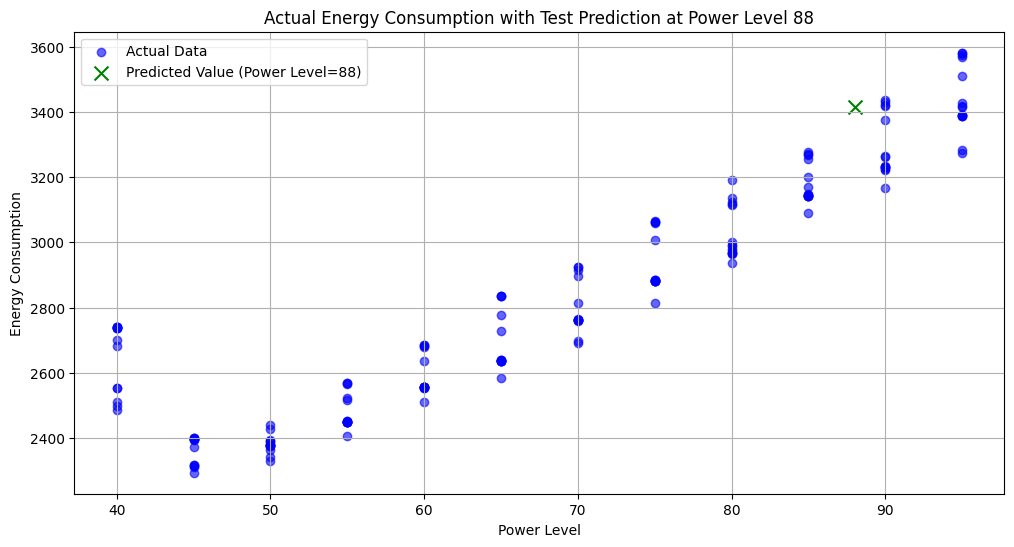

In [52]:
# Plot the original data
plt.figure(figsize=(12, 6))
plt.scatter(long_data['Power_Level'], long_data['Energy_Consumption'], color='blue', label='Actual Data', alpha=0.6)

# Plot the predicted point
plt.scatter(88, predicted_energy_consumption, color='green', marker='x', s=100, label='Predicted Value (Power Level=88)')

# Add labels and title
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.title('Actual Energy Consumption with Test Prediction at Power Level 88')
plt.legend()
plt.grid(True)
plt.show()